In [37]:
import numpy as np
import math
import pandas
import csv
import matplotlib.pyplot as plt
%matplotlib inline

In [48]:
def read_file(fn):
    # load data
    filename = fn
    with open(filename,'r') as csvfile:
        reader = csv.reader(csvfile)
        country = []
        year = []
        pop = []
        cont = []
        lifeExp = []
        gdp = []
        for row in reader:
            if row[0] != 'country':
                country.append(row[0])
                year.append(int(row[1]))
                pop.append(row[2])
                cont.append(row[3])
                lifeExp.append(float(row[4]))
                gdp.append(row[5])

In [49]:
read_file('data/gapminder.csv')

In [51]:
df = pandas.read_csv('data/gapminder.csv')

In [52]:
df.head()

,country,year,pop,continent,lifeExp,gdpPercap
0,Afghanistan,1952,8425333.0,Asia,28.801,779.445314
1,Afghanistan,1957,9240934.0,Asia,30.332,820.853030
2,Afghanistan,1962,10267083.0,Asia,31.997,853.100710
3,Afghanistan,1967,11537966.0,Asia,34.020,836.197138
4,Afghanistan,1972,13079460.0,Asia,36.088,739.981106


In [168]:
# Rename the pop header, as there exists a function df.pop()
df=df.rename(columns={"pop": "Pop"})

In [69]:
df.country.unique()

array(['Afghanistan', 'Albania', 'Algeria', 'Angola', 'Argentina',
       'Australia', 'Austria', 'Bahrain', 'Bangladesh', 'Belgium', 'Benin',
       'Bolivia', 'Bosnia and Herzegovina', 'Botswana', 'Brazil',
       'Bulgaria', 'Burkina Faso', 'Burundi', 'Cambodia', 'Cameroon',
       'Canada', 'Central African Republic', 'Chad', 'Chile', 'China',
       'Colombia', 'Comoros', 'Congo Dem. Rep.', 'Congo Rep.',
       'Costa Rica', "Cote d'Ivoire", 'Croatia', 'Cuba', 'Czech Republic',
       'Denmark', 'Djibouti', 'Dominican Republic', 'Ecuador', 'Egypt',
       'El Salvador', 'Equatorial Guinea', 'Eritrea', 'Ethiopia',
       'Finland', 'France', 'Gabon', 'Gambia', 'Germany', 'Ghana',
       'Greece', 'Guatemala', 'Guinea', 'Guinea-Bissau', 'Haiti',
       'Honduras', 'Hong Kong China', 'Hungary', 'Iceland', 'India',
       'Indonesia', 'Iran', 'Iraq', 'Ireland', 'Israel', 'Italy',
       'Jamaica', 'Japan', 'Jordan', 'Kenya', 'Korea Dem. Rep.',
       'Korea Rep.', 'Kuwait', 'Lebanon',

In [79]:
def plot_country_lifeExp(country):
    plt.plot(df.year[df["country"]==country],df.lifeExp[df["country"]==country],'bo')
    plt.xlabel('Year')
    plt.ylabel('Life Expectancy')
    plt.title(country)

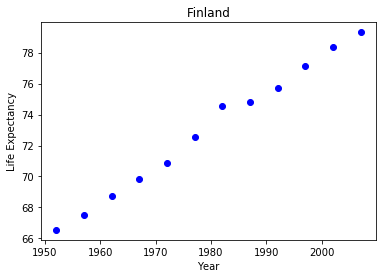

In [80]:
plot_country_lifeExp('Finland')

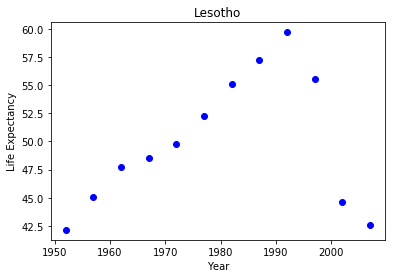

In [81]:
plot_country_lifeExp('Lesotho')

In [118]:
def plot_countries_list(A):
    for entry in A:
        plt.plot(df.year[df["country"]==entry],df.lifeExp[df["country"]==entry])
        plt.xlabel('Year')
        plt.ylabel('Life Expectancy')
    plt.legend(A,loc='lower right',ncol=2)
    plt.title('Comparison of Country Life Expectancy')

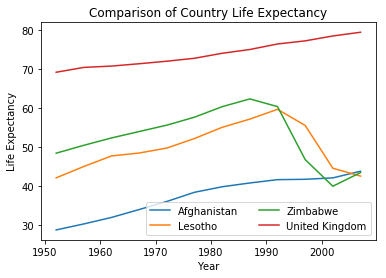

In [119]:
plot_countries_list({"Afghanistan","United Kingdom","Lesotho","Zimbabwe"})

In [170]:
def plot_count_list(A,b):
    '''
    This function plots a property, supplied as b, of selected countries, supplied as a list in A
    Example:
        plot_count_list({"Germany","France"},"Pop")
    Returns a plot of the populations of Germany and France through time
    '''
    for entry in A:
        yseries = eval("df"+"."+b)
        plt.plot(df.year[df["country"]==entry],yseries[df["country"]==entry])
        plt.xlabel('Year')
        plt.ylabel(b)
        plt.legend(A,loc='upper left',ncol=2)
        plt.title('Comparison of Countries')

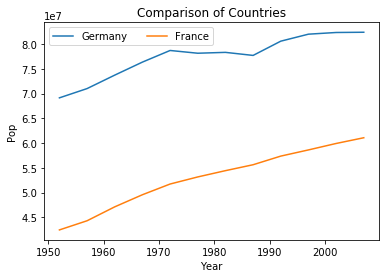

In [171]:
plot_count_list({"Germany","France"},"Pop")

In [211]:
def country_statistics():
    gdp_max = df[df["gdpPercap"]==df["gdpPercap"].max()]
    gdp_min = df[df["gdpPercap"]==df["gdpPercap"].min()]
    lE_max = df[df["lifeExp"]==df["lifeExp"].max()]
    lE_min = df[df["lifeExp"]==df["lifeExp"].min()]
    pop_max = df[df["Pop"]==df["Pop"].max()]
    pop_min = df[df["Pop"]==df["Pop"].min()]
    return gdp_max,gdp_min,lE_max,lE_min,pop_max,pop_min

In [228]:
a,b,c,d,e,f = country_statistics()
print("Max GDP:\n",a)
print()
print("Min GDP:\n",b)
print()
print("Max Life Expectancy:\n",c)
print()
print("Min Life Expectancy:\n",d)
print()
print("Max Population:\n",e)
print()
print("Min Population:\n",f)
#np.concatenate((A,B[1]),axis=1)

Max GDP:
     country  year       Pop continent  lifeExp    gdpPercap
853  Kuwait  1957  212846.0      Asia   58.033  113523.1329

Min GDP:
              country  year         Pop continent  lifeExp   gdpPercap
334  Congo Dem. Rep.  2002  55379852.0    Africa   44.966  241.165877

Max Life Expectancy:
     country  year          Pop continent  lifeExp    gdpPercap
803   Japan  2007  127467972.0      Asia   82.603  31656.06806

Min Life Expectancy:
      country  year        Pop continent  lifeExp   gdpPercap
1292  Rwanda  1992  7290203.0    Africa   23.599  737.068595

Max Population:
     country  year           Pop continent  lifeExp    gdpPercap
299   China  2007  1.318683e+09      Asia   72.961  4959.114854

Min Population:
                     country  year      Pop continent  lifeExp   gdpPercap
1296  Sao Tome and Principe  1952  60011.0    Africa   46.471  879.583586


In [234]:
df.sort_values("Pop",ascending=False).head()

,country,year,Pop,continent,lifeExp,gdpPercap
299,China,2007,1.318683e+09,Asia,72.961,4959.114854
298,China,2002,1.280400e+09,Asia,72.028,3119.280896
297,China,1997,1.230075e+09,Asia,70.426,2289.234136
296,China,1992,1.164970e+09,Asia,68.690,1655.784158
707,India,2007,1.110396e+09,Asia,64.698,2452.210407


China had both the highest population in 2007 and the second highest in 2002
